# Lab Six - Arctic Indicators

## *Calculating Rates of Change of Sea Ice Extent & Mapping*


You will learn how to: 

- Use netCDF files (network Common Data Form).
- Plot multivariable data over global projections. 
- Use linear regression to analyze sea ice projections.  
- Install python packages (if at University of Michigan).
- Use command line (if at University of Michigan).
- Create self-defined colorbars.

By the end of this lab you should be able to: read in netCDF files and perform linear regression in Python. 

WARNING TO OUTSIDE USERS: 
- This lab is dependent on [NetCDF4](http://unidata.github.io/netcdf4-python/) and [Basemap](https://matplotlib.org/basemap/users/intro.html). Basemap is being replaced by Cartopy so we reccomend installing both Basemap and Cartopy.  

Additional materials for reading: 
- Basemap examples - https://matplotlib.org/basemap/users/examples.html
- Scientific Source Materials & Inspirations:
    - [Witt (2013). Using Data from Climate Science to Teach Introductory Statistics. Journal of Statistics Education.](www.amstat.org/publications/jse/v21n1/witt.pdf)
    - [Serreze & Stroeve (2015). Arctic sea ice trends, variability and implications for seasonal ice forecasting.](http://rsta.royalsocietypublishing.org/content/373/2045/20140159.full.pdf)
    - [National Snow and Ice Data Center - Sea Ice Index: Interpretation Resources for Sea Ice Trends and Anomalies](https://nsidc.org/data/noaa/g02135-interpretation#other)
- Data from:
    - Sea Ice Extent: 
        - Walsh, J. E., W. L. Chapman, and F. Fetterer. 2015, updated 2016. Gridded Monthly 
        Sea Ice Extent and Concentration, 1850 Onward, Version 1. Boulder, Colorado USA. 
        NSIDC: National Snow and Ice Data Center. doi: http://dx.doi.org/10.7265/N5833PZ5. 
        [Accessed 2/12/2018]. 
    - Sea Ice Time Series:
         - Fetterer, F., K. Knowles, W. Meier, M. Savoie, and A. K. Windnagel. 2017, updated 
         daily. Sea Ice Index, Version 3. Monthly Time Series. Boulder, Colorado USA. NSIDC: 
         National Snow and Ice Data Center. doi: http://dx.doi.org/10.7265/N5K072F8. [Accessed 
         2/13/2018]. 

Gratitude to [Camilla Harris](https://github.com/cdkharris), and [Samantha Basile](https://clasp.engin.umich.edu/people/samantha-basile/) for implementation of this lab. 


## Part A: Some Odds and Ends - Resampling Review

I wanted to quickly review a concept from lab 4, mainly re-sampling. In lab 4 we saw data that had been taken at roughly a minute each. But what if this also had missing data? Or missing indexes? Let's see this example below. 

----


In [1]:
#import our required packages for the example
import pandas as pd
import numpy as np
import datetime as dt
#let's set up some example data that is messy

#set up an index for our data
#this is how you can make an array of datetimes ranging from day 1 to 2 of January 2005 every minute
datetimeIndex = np.arange(dt.datetime(2005, 1, 1), dt.datetime(2005, 1, 2), dt.timedelta(minutes = 1))

#set up a dataframe
exampleData = pd.DataFrame(index = datetimeIndex, columns = ['ExampleCol'])

#make some nonsense data in this

exampleData['ExampleCol'] = 5.0

print(exampleData.head())

print("\n The length of this dataset is {}".format(len(exampleData)))

                     ExampleCol
2005-01-01 00:00:00         5.0
2005-01-01 00:01:00         5.0
2005-01-01 00:02:00         5.0
2005-01-01 00:03:00         5.0
2005-01-01 00:04:00         5.0

 The length of this dataset is 1440


### Now what happens if there are random times MISSING from this dataset?

In [2]:
#drop some random dates
exampleData = exampleData.drop(index = [dt.datetime(2005, 1, 1, 0, 2), 
                          dt.datetime(2005, 1, 1, 0, 5), 
                          dt.datetime(2005, 1, 1, 0, 10)])


print(exampleData.head())

print("\n The length of this dataset is {}".format(len(exampleData)))

                     ExampleCol
2005-01-01 00:00:00         5.0
2005-01-01 00:01:00         5.0
2005-01-01 00:03:00         5.0
2005-01-01 00:04:00         5.0
2005-01-01 00:06:00         5.0

 The length of this dataset is 1437


In [3]:

#now we sample the dataset at 1 minute cadence
exampleData = (exampleData.resample('60S').asfreq())

print(exampleData.head(n = 10))

print("\n The length of this dataset is {}".format(len(exampleData)))


                     ExampleCol
2005-01-01 00:00:00         5.0
2005-01-01 00:01:00         5.0
2005-01-01 00:02:00         NaN
2005-01-01 00:03:00         5.0
2005-01-01 00:04:00         5.0
2005-01-01 00:05:00         NaN
2005-01-01 00:06:00         5.0
2005-01-01 00:07:00         5.0
2005-01-01 00:08:00         5.0
2005-01-01 00:09:00         5.0

 The length of this dataset is 1440


## Part B: Inspiration

I've made some animations of the dataset we are going to use in this lab. Navigate to the animations folder and check them out! I'll pull it up on the main screen here...

----

## Part C: Installation of Non - Included Packages

So far we've dealt with included packages in our version of Python like numpy, pandas etc. We've also seen how to deal with writing our own modules, like externalfunctions.py in Lab3. In this lab we will install two packages not included in our version of Python. 

### Please put your nametag up, once you have installed this successfully by running the below cell then you can put your nametag down.



### On the CAEN computers

**Step 1:** Use the search function (lower left on home screen) to find "Anaconda Prompt"

**Step 2:** Type into the prompt once open (one at a time!): 
    - conda install basemap
    - conda install netcdf4
    - conda install basemap-data-hires

#### If it asks for Proceed ([y]/n)?  - you should enter y. This will take some time! Be patient!

**Step 3:** Shut down Jupyter. Close all the windows. Then reopen.

**Step 4:** Run the next cell. If you completed these sucessfully your code will run without error.
    

### If you are on a non-CAEN computer (PC):
- Follow the above steps for the CAEN computers.

### If you are on a non-CAEN computer (Macintosh):
- Open the application under Applicatons -> Utilities -> Terminal.app
- Type and follow along with the commands as follows into your terminal. 
     - conda install basemap
     - conda install netcdf4
     - conda install basemap-data-hires
     
     If it asks for Proceed ([y]/n)?  - you should enter y.
----

## *Part 1 - Checking your installation of packages*

If this cell DOES NOT WORK then you did not install the package correctly and you will need to keep working.



In [4]:
#importing required packages for this lab - this cell will not work if 
#you did not get the packages imported correctly.

import matplotlib.pyplot as plt #for plotting 
from matplotlib.ticker import MultipleLocator
                                #for locating ticks on map
import importlib                #for reimporting 
                                #libaries / packages
from matplotlib.colors import ListedColormap
                                #NEW IN THIS LAB - 
                                #for making your own colorbars
        
import linerror  as lr          #NEW IN THIS LAB - this is a package writen
                                #by the TA - for calculating the error
                                #on linear fits
        
from scipy import stats         #NEW IN THIS LAB - 
                                #we've used scipy before - in Lab5
                                #in this lab we use scipy stats 
                                #for linear regression
            
from mpl_toolkits.basemap import Basemap
                                #NEW IN THIS LAB - 
                                #for plotting on top of basemaps aka 
                                #geographical projections
            
from netCDF4 import Dataset, date2index, num2date
                                #NEW IN THIS LAB - 
                                #for handling netCDF files
        
#for plotting in notebook
%matplotlib inline


## *Part 2 - Reading in netCDF Files in Python*

Geospatial data, especially gridded data (ie latitude & longitude) will often come in netCDF format. Starting to use data in this format supports additional analysis as you will find many data in netCDF formats as you continue in data science. 

As stated on their website - "The netCDF libraries support a machine-independent format for representing scientific data. Together, the interfaces, libraries, and format support the creation, access, and sharing of scientific data." https://www.unidata.ucar.edu/software/netcdf/docs/faq.html

You can think of netCDF as a dictionary like object but with methods / metadata that contain additional helpful information about the data. 

The metadata in particular is why netCDF is useful.

Note: metadata is data that describes other data, or in this case usually text that describes columns. 

### Let's see what this actually looks like. Read in the netCDF file below and work your way up to Part 3 - Dealing with time in netCDF files.



In [5]:
#let's start by reading in some netCDF file data - notice the extension as nc

#use the Dataset method in netCDF4 package to read in 
#the netCDF file from NSIDC


dataset = Dataset('./NSIDC_Data/Gridded/G10010_SIBT1850_v1.1.nc')
#This data is from: nsidc.org/data/G10010
#These data are the Gridded Monthly Sea Ice Extent and Concentration from 1850 Onward - 
#each data point contains the sources of the data observation themselves
#ranging from ship observations to satellite passive microwave data - see citation
#from Walsh et al., 2016 - cadence is monthly.

#Data accessed from the National Snow & Ice Data Center


In [6]:
#Similar to dictionaries and dataframes, we can access 
#attributes of the netCDF data 

#describe the netCDF DataSet
print(dataset)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.6.2 (http://code.zmaw.de/projects/cdi)
    Conventions: CF-1.4
    nco_openmp_thread_number: 1
    CDO: Climate Data Operators version 1.6.2 (http://code.zmaw.de/projects/cdo)
    NCO: 4.4.2
    version: 1.0
    release_date: December_30,_2015
    history: Updated G10010_SIBT1850.nc; Enforced consistent land mask for all gridcells at all months and years
    filename: G10010_SIBT1850_v1.01i
    dimensions(sizes): latitude(240), longitude(1440), time(1968)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 seaice_conc(time,latitude,longitude), float32 seaice_source(time,latitude,longitude), float64 time(time)
    groups: 



**Think about this output. Note the dimensions and the variables? What do YOU think the difference between variables and dimensions is? Think about this for a few seconds before moving on.**

In [7]:
#let's poke at this some...print out a list of the variables

varSeaIce = [var for var in dataset.variables]  
#list of variables
#using list comprehension again - like in Lab 5
print(varSeaIce)

['latitude', 'longitude', 'seaice_conc', 'seaice_source', 'time']


In [8]:
#let's take a look at these columns...
print("Variable information:")
print(varSeaIce)
for var in varSeaIce:
    print('Variable: {}'.format(var))
    print("\tdimensions: {}".format(dataset.variables[var].dimensions))
    print("\tsize: {}".format(dataset.variables[var].size))

Variable information:
['latitude', 'longitude', 'seaice_conc', 'seaice_source', 'time']
Variable: latitude
	dimensions: ('latitude',)
	size: 240
Variable: longitude
	dimensions: ('longitude',)
	size: 1440
Variable: seaice_conc
	dimensions: ('time', 'latitude', 'longitude')
	size: 680140800
Variable: seaice_source
	dimensions: ('time', 'latitude', 'longitude')
	size: 680140800
Variable: time
	dimensions: ('time',)
	size: 1968


In [9]:
#what if we want to look at one of the variables like time?
print(dataset.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    units: days since 2001-01-01 00:00:00
    calendar: standard
unlimited dimensions: time
current shape = (1968,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [10]:
#we can access the metadata about the time variable using the following
#format:

print(dataset.variables['time'].units)

days since 2001-01-01 00:00:00


### Activity for you! Work with your neighbor to print out information about the seaice_source variable. Use the same format we used in the above two cells.

In [11]:
#BELOW PRINT OUT information about the seaice_source variable



-

-

-

-

-

-

-

-

-

## *Part 3 - Dealing with Time in netCDF Data*

Notice the units on the netCDF data for time? How would we get this into a datetime format? Let's first work on accessing these values. 


### Part 3. A. Converting to Datetimes

In [12]:
#if we look at those values as is...

print(dataset.variables['time'][:])



[-55138. -55107. -55079. ...,   4670.   4701.   4731.]


### Why do you think some of these are negative?

-

-

-

-

In [13]:
#what if we want these as datetimes? 
time = dataset.variables['time']

#use the num2date method, takes in the time cdf values
#using the same units (ie past 2001), in the same
#calendar, ie gregorian it outputs:

#the [:] syntax in this case accesses the VALUES in the time 
#data
dates = num2date(time[:], units=time.units, calendar = time.calendar)


### This created dates from the format that we saw before. In the cell below we print out the dates variable.

In [14]:
print(dates)

[datetime.datetime(1850, 1, 15, 0, 0) datetime.datetime(1850, 2, 15, 0, 0)
 datetime.datetime(1850, 3, 15, 0, 0) ...,
 datetime.datetime(2013, 10, 15, 0, 0)
 datetime.datetime(2013, 11, 15, 0, 0)
 datetime.datetime(2013, 12, 15, 0, 0)]


### How was this different from how we converted to datetime before?

-

-

-

### Part 3. B. Accessing Data Points in netCDF

Let's work to access one data point in the netCDF file that we just imported.

In [15]:
#Let's look at one time index here - 

#looking at 1990 - September 15th
testDate = dt.datetime(1990, 9, 15)

#before we remade an index, this is another way to deal
#with indexing and datetime issues in netCDF / Python

#look in the time values for WHERE the testDate occurs
timeInd = date2index(testDate, dataset.variables['time']) # find time index for desired date.

print(timeInd)

1688


In [16]:
#looking at JUST the sea ice concentration? 

ice = dataset.variables['seaice_conc']
print(ice)



<class 'netCDF4._netCDF4.Variable'>
float32 seaice_conc(time, latitude, longitude)
    short_name: concentration
    long_name: Sea_Ice_Concentration
    standard_name: Sea_Ice_Concentration
    units: Percent
unlimited dimensions: time
current shape = (1968, 240, 1440)
filling on, default _FillValue of 9.969209968386869e+36 used



### Check out the current shape of this. This is NOT just an array. In fact it's most similar to the numpy ndarrays we used to evaluate the images. That means we have three index values we need to keep track of. Check out the code below.

In [17]:
sizeIce = ice[timeInd, :, :].size
dimensionsIce = ice[timeInd, :, :].shape
print("The size of the data is: {} ".format(sizeIce) + 
      "\nThe shape of the data is: {}".format(dimensionsIce))

sliceIce = ice[timeInd, :, :]

The size of the data is: 345600 
The shape of the data is: (240, 1440)


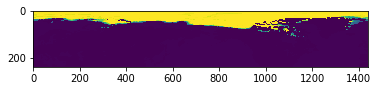

In [18]:

#with imshow -
plt.imshow(sliceIce);


## Question for you. What is the "sliceIce" variable given the plot that we made using imshow() above?



-

-

-

-

-

Remember those latitude and longitude values we had? Let's put this actually ONTO a map.

The same of the longitude is (1440,)
The same of the latitude is (240,)
The same of the grid is (240, 1440)
The same of the grid is (240, 1440)


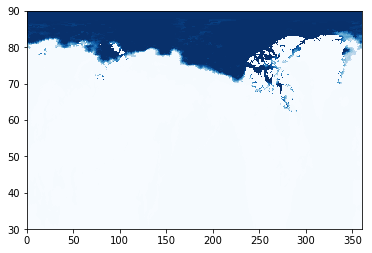

In [19]:
lats = dataset.variables['latitude'][:]  #grab lat and long data
lons = dataset.variables['longitude'][:]
#have to use accessor [:] to access into the data itself 

print('The same of the longitude is {}'.format(lons.shape))
print('The same of the latitude is {}'.format(lats.shape))

#make a meshgrid for plotting
lons, lats = np.meshgrid(lons, lats)

print('The same of the grid is {}'.format(lons.shape))
print('The same of the grid is {}'.format(lats.shape))


#look at the shape of lons and lats

plt.pcolormesh(lons, lats, sliceIce, shading='flat', 
               cmap = 'Blues');



### What's confusing about this particular map?

-

-

-

-

-

-

## *Part 4 - Plotting Geospatial Data on Maps - Projections*

In this section we learn how to merge map based projections into plotting netCDF data.



### Part 4. A. Playing with Basemap

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


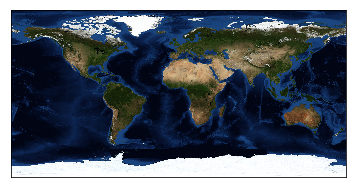

In [20]:
fig = plt.figure()
#low resolution base map in the "NASA Blue Marble style"
ax = Basemap(resolution = 'l').bluemarble()

### Let's chat about this for a short second...

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


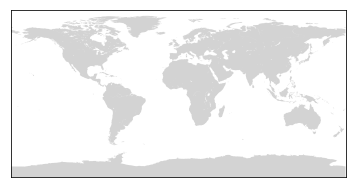

In [21]:
#low resolution base map with simply defined continents
fig = plt.figure()
ax = Basemap(resolution = 'l').fillcontinents(color = '#d3d3d3');


### What if we just want the polar region? Let's set up a sterographic basemap.

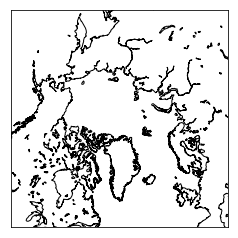

In [22]:
#lat_ts is the latitude of true scale
#lat_0, lon_0 is the central point. 

lat_ts = 90.0 #set the pole to a true scale 
lat_0  = 90.0 #set center to be at pole and with Greenland to south
lon_0  = -45.0 #set the 0 point of longitude

#width and height set up projection of the map in meters 
width  = 9000000.0
height = 9000000.0
m = Basemap(width = width, height = height, resolution = 'l', projection='stere',
            lat_ts = lat_ts, lat_0 = lat_0, lon_0 = lon_0)


#draw the coastlines
m.drawcoastlines();


### Part 4. B. Plotting Scientific Data Onto Base Map


Now let's take that sea ice data, and plot this onto the map that we just created.


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


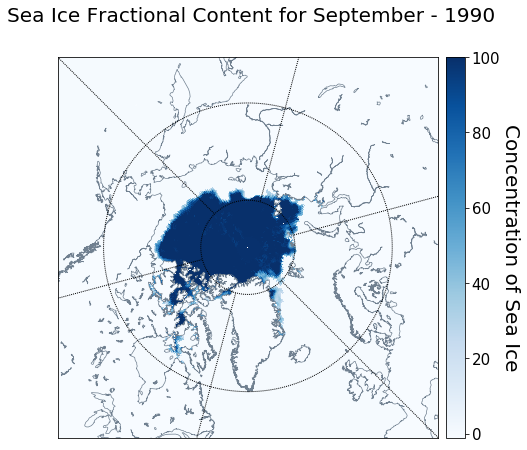

In [23]:
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Sea Ice Fractional Content for {:%B - %Y}'.format(testDate), 
             fontsize=20)


lat_ts = 90.0 #set the pole to a true scale 
lat_0  = 90.0 #set center to be at pole and with Greenland to south
lon_0  = -45.0

#width and height set up projection of the map in meters 
width  = 9000000.0
height = 9000000.0

m = Basemap(width = width, height = height, resolution = 'l', projection='stere',
            lat_ts = lat_ts, lat_0 = lat_0, lon_0 = lon_0)
#draw the coastlines
m.drawcoastlines(linewidth = 0.7, color = '#708090')

iceMap = m.pcolormesh(lons, lats, sliceIce, shading='flat', cmap = 'Blues', latlon=True)

#draw guiding 
m.drawparallels(np.arange(-90.0,  99.0,  30.0))
m.drawmeridians(np.arange(-180.0, 180.0, 60.0))

#add colorbar for the data - note how we are not adding the axis?
cb = m.colorbar(iceMap, "right", size="5%", pad="2%")

cb.set_label('Concentration of Sea Ice', labelpad=20,
                     rotation=270, fontsize=20)
cb.ax.tick_params(labelsize=15)



### Discussion time. What visualization based improvements can be made here on this plot?



-

-

-

-

### Part 4. C. Quantizing Color Bars & Making Our Own Color Bar



/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


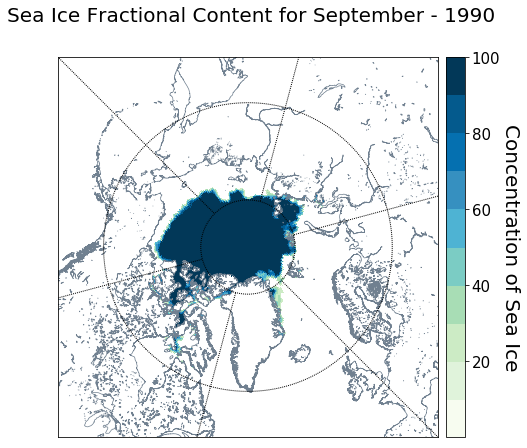

In [24]:
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Sea Ice Fractional Content for {:%B - %Y}'.format(testDate), 
             fontsize=20)


lat_ts = 90.0 #set the pole to a true scale 
lat_0  = 90.0 #set center to be at pole and with Greenland to south
lon_0  = -45.0

#width and height set up projection of the map in meters 
width  = 9000000.0
height = 9000000.0

m = Basemap(width = width, height = height, resolution = 'h', projection='stere',
            lat_ts = lat_ts, lat_0 = lat_0, lon_0 = lon_0)
#draw the coastlines
m.drawcoastlines(linewidth = 0.7, color = '#708090')

#CHANGED TO NEW COLORBAR - we defined this here!
#------------------------------------------------
#CHANGED TO NEW COLORBAR
#from colorbrewer2.org - 
icyBluesHex = ['#f7fcf0', '#e0f3db', '#ccebc5', '#a8ddb5', '#7bccc4', 
               '#4eb3d3', '#3690c0', '#0570b0', '#045a8d', '#023858']

icyBlues = ListedColormap(icyBluesHex)

iceMap = m.pcolormesh(lons, lats, sliceIce, vmin = 0.01, 
                      shading='flat', cmap = icyBlues, latlon=True)
#set under to white - 
iceMap.cmap.set_under('#ffffff')
#------------------------------------------------
#draw guiding 
m.drawparallels(np.arange(-90.0,  99.0,  30.0))
m.drawmeridians(np.arange(-180.0, 180.0, 60.0))

#add colorbar for the data - note how we are not adding the axis?
cb = m.colorbar(iceMap, "right", size="5%", pad="2%")

cb.set_label('Concentration of Sea Ice', labelpad=20,
                     rotation=270, fontsize=20)
cb.ax.tick_params(labelsize=15)

### Now if we set up different labels on the color bar  - 

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


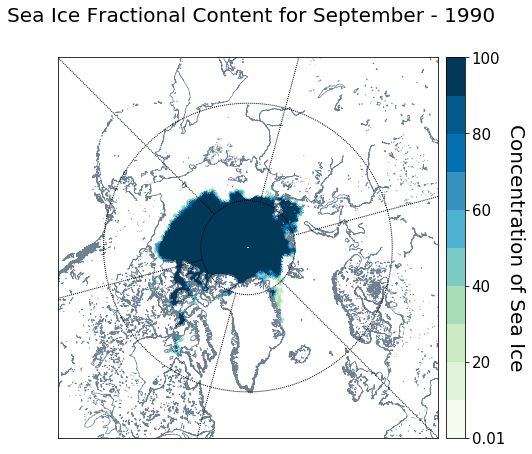

In [25]:

fig = plt.figure(figsize=(11, 7))
fig.suptitle('Sea Ice Fractional Content for {:%B - %Y}'.format(testDate), 
             fontsize=20)


lat_ts = 90.0 #set the pole to a true scale 
lat_0  = 90.0 #set center to be at pole and with Greenland to south
lon_0  = -45.0

#width and height set up projection of the map in meters 
width  = 9000000.0
height = 9000000.0

m = Basemap(width = width, height = height, resolution = 'h', projection='stere',
            lat_ts = lat_ts, lat_0 = lat_0, lon_0 = lon_0)
#draw the coastlines
m.drawcoastlines(linewidth = 0.7, color = '#708090')

iceMap = m.pcolormesh(lons, lats, sliceIce, vmin = 0.01, 
                      shading='flat', cmap = icyBlues, latlon=True)

#set under to white - 
iceMap.cmap.set_under('#ffffff')
#draw guiding 
m.drawparallels(np.arange(-90.0,  99.0,  30.0))
m.drawmeridians(np.arange(-180.0, 180.0, 60.0))

#add colorbar for the data - note how we are not adding the axis?

#NEW IN THIS PLOTTING ROUND - ticks keyword + set tick labels
#####------------------------------------------------------------
cb = m.colorbar(iceMap, "right", size="5%", pad="2%", 
                ticks = [0.01, 20, 40, 60, 80, 100])

cb.ax.set_yticklabels([0.01, 20, 40, 60, 80, 100]) #colorbar
#####------------------------------------------------------------

cb.set_label('Concentration of Sea Ice', labelpad=20,
                     rotation=270, fontsize=20)

cb.ax.tick_params(labelsize=15)




## *Part 5 - Changes Over Time*


This was just the plot of the extent of the sea ice at the end of the summer (September) in 1990. What about a more recent date? 

### Part 5. A. Quick Look at Two Distinct Time Periods

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


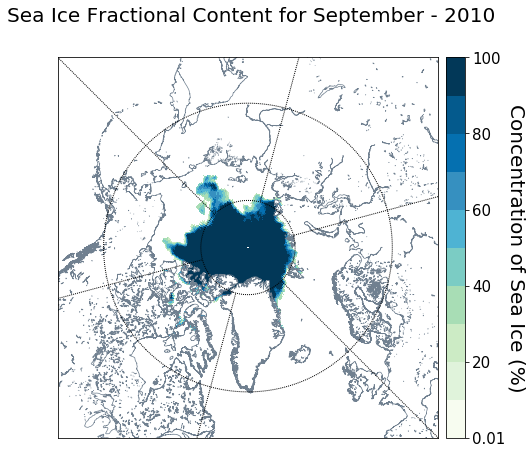

In [26]:
####----------Main change is the date index we are using
dateLate  = dt.datetime(2010, 9, 15)
####

fig = plt.figure(figsize=(11, 7))
fig.suptitle('Sea Ice Fractional Content for {:%B - %Y}'.format(dateLate), 
             fontsize=20)

lat_ts = 90.0 #set the pole to a true scale 
lat_0  = 90.0 #set center to be at pole and with Greenland to south
lon_0  = -45.0

#width and height set up projection of the map in meters 
width  = 9000000.0
height = 9000000.0

m = Basemap(width = width, height = height, resolution = 'h', projection='stere',
            lat_ts = lat_ts, lat_0 = lat_0, lon_0 = lon_0)
#draw the coastlines
m.drawcoastlines(linewidth = 0.7, color = '#708090')


timeInd = date2index(dateLate, dataset.variables['time']) # find time index for desired date.
sliceIce = ice[timeInd, :, :]

iceMap = m.pcolormesh(lons, lats, sliceIce, vmin = 0.01, 
                      shading='flat', cmap = icyBlues, latlon=True)

#set under to white - 
iceMap.cmap.set_under('#ffffff')
#draw guiding 
m.drawparallels(np.arange(-90.0,  99.0,  30.0))
m.drawmeridians(np.arange(-180.0, 180.0, 60.0))

cb = m.colorbar(iceMap, "right", size="5%", pad="2%", 
                ticks = [0.01, 20, 40, 60, 80, 100])

cb.ax.set_yticklabels([0.01, 20, 40, 60, 80, 100]) #colorbar

cb.set_label('Concentration of Sea Ice (%)', labelpad=20,
                     rotation=270, fontsize=20)

cb.ax.tick_params(labelsize=15)

plt.savefig('./Figures/{:%Y}SeaIceConcentration.png'.format(dateLate))


### Does this look like it's different from 1990? How could we tell?

-


-

-

-

-


### Part 5. B.  *Linear Regression of Sea Ice*



In [27]:
#let's start by importing our summary data - 

#we use the Sea Ice Index, version 3 from the National Snow and Ice Data Center


#as described from: http://nsidc.org/data/G02135#
#"The Sea Ice Index provides a quick look at Arctic- 
#and Antarctic-wide changes in sea ice. It is a source for consistent, 
#up-to-date sea ice extent and concentration images, in PNG format, 
#and data values, in ASCII text files, from November 1978 to the present.
#Sea Ice Index images also depict trends and anomalies in ice cover 
#calculated using a 30-year reference period of 1981 through 2010.

#The images and data are produced in a consistent way that makes 
#the Index time-series appropriate for use when looking at long-term trends in 
#sea ice cover. 



#we will be focusing on September in this analysis to match with our plots
#you can access this month at: 
#ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/N_09_extent_v3.0.csv

In [28]:
septSeaIce = pd.read_csv('./NSIDC_Data/SeaIceIndex/G02135_north_09_extent_v3.0.txt', 
                         sep = ',')

print(septSeaIce.head(n=5), '\n', septSeaIce.tail(n=5))

#note the extent and area are in millions of kilometers - since all the data are in
#september, we will skip making a date time index


   year   mo      data-type   region   extent     area
0  1979    9        Goddard        N     7.05     4.58
1  1980    9        Goddard        N     7.67     4.87
2  1981    9        Goddard        N     7.14     4.44
3  1982    9        Goddard        N     7.30     4.43
4  1983    9        Goddard        N     7.39     4.70 
     year   mo      data-type   region   extent     area
34  2013    9        Goddard        N     5.21     3.78
35  2014    9        Goddard        N     5.22     3.74
36  2015    9        Goddard        N     4.62     3.42
37  2016    9        NRTSI-G        N     4.51     2.86
38  2017    9        NRTSI-G        N     4.80     3.30


### Let's take an exploratory look at this data.

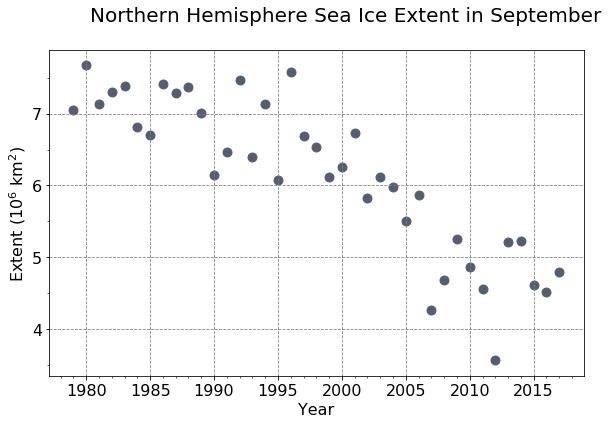

In [29]:

fig = plt.figure(figsize=(11, 6))

fig.suptitle('Northern Hemisphere Sea Ice Extent in September', fontsize=20)

#create grid spec and axis
gs = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0, right = 0.8)

#creating ax1 and ax2 for upper plots
ax = fig.add_subplot(gs[:,:])

ax.scatter(septSeaIce['year'], septSeaIce[' extent'], color = '#545e6e', s = 80)

ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Extent (10$^{6}$ km$^{2}$)', fontsize = 16)

ax.grid(color='gray', linestyle='dashed')
ax.tick_params(labelsize=16)

#set up locators
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

### What if we want to use least squares linear regression like we learned about in monday to fit this whole trend to a line?

The following accesses the scipy stats package to use linear regression this is not the ONLY package we can use and in later classes we
will see a preview for some of learning packages in python

In [30]:
#what if we want to use least squares linear regression 
#like we learned about in monday to fit this whole trend to a line?

#the following accesses the scipy stats package to use linear regression
#this is not the ONLY package we can use and in later classes we
#will see a preview for some of learning packages in python
slope, intercept, rval, pval, stderr = stats.linregress(septSeaIce['year'], 
                                                        septSeaIce[' extent'])

#this command outputs several informative metrics to evaluate
#the fit of this line. 

help(stats.linregress)

#in this case stderr is the error on the slope that can be caluclated from 8.17

#let's see how this looks on the plot with error


Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

### This ran the fit! I've written a package that we imported earlier to calculate some of the errors that we would expect on the coefficents (slide 26 Lecture 6) 

In [31]:
importlib.reload(lr)

#first we set up the expected model output 
#and compare this to the data
x      = septSeaIce['year']
yModel = intercept +  slope * x
yData  = septSeaIce[' extent']

#error on y values
RMSE = lr.calcRMSE(yModel, yData)

#error on coefficents, slope and y-intercept and.
errSlope, errInter = lr.calcCoeffsErr(x, RMSE)




Fit Report: 
 	RMSE: +/- 0.54
 	Intercept: 172.65 +/- 15.31
	Slope: -0.08 +/- 0.01


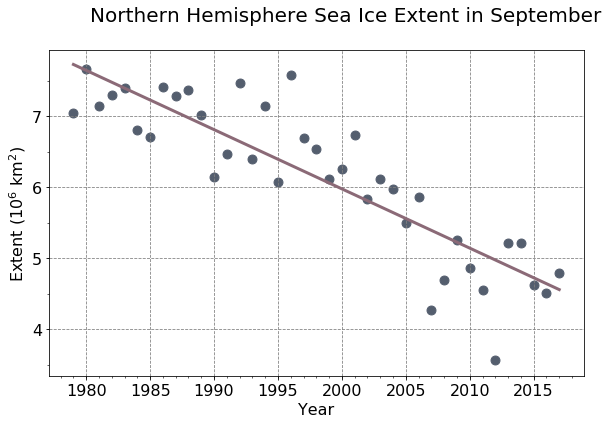

In [32]:
fig = plt.figure(figsize=(11, 6))

fig.suptitle('Northern Hemisphere Sea Ice Extent in September', fontsize=20)

#create grid spec and axis
gs = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0, right = 0.8)

#creating ax1 and ax2 for upper plots
ax = fig.add_subplot(gs[:,:])

ax.scatter(septSeaIce['year'], septSeaIce[' extent'], color = '#545e6e', s = 80)
ax.plot(septSeaIce['year'], intercept +  slope * septSeaIce['year'], 
        color = '#8b6a77', linewidth = 3.0)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Extent (10$^{6}$ km$^{2}$)', fontsize = 16)

ax.grid(color='gray', linestyle='dashed')
ax.tick_params(labelsize=16)

#set up locators
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

print("Fit Report: \n \tRMSE: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, errSlope))


### What do we think about this fit? Does it look appropiate? Can we say anything about if this data is linear about what we just did?

-

-

-

-

-

-

-

### Part 5. C. Quasi-Linear Fit - Splitting Up Data -

Let's split this into two segments and redo this fit - 

In [33]:
#breaking our data up into components
#based on Serreze et al. 2015 - 

ind     = septSeaIce['year'] >= 1996
xPre96  = septSeaIce.loc[~ind, 'year']
xPost96 = septSeaIce.loc[ind, 'year']

yPre96  = septSeaIce.loc[~ind, ' extent']
yPost96 = septSeaIce.loc[ind, ' extent']

In [34]:
#run the two segmented fits

slopePre96,  interceptPre96,  rval, pval, stderr = stats.linregress(xPre96,  yPre96)
slopePost96, interceptPost96, rval, pval, stderr = stats.linregress(xPost96, yPost96)

In [35]:
#calculate the errors

yModelPre96 = interceptPre96   +  slopePre96  * xPre96
yModelPost96 = interceptPost96 +  slopePost96 * xPost96

#error on y values
RMSEPre  = lr.calcRMSE(yModelPre96,  yPre96)
RMSEPost = lr.calcRMSE(yModelPost96, yPost96)

#error on coefficents, slope and y-intercept and.
errSlopePre,  errInterPre = lr.calcCoeffsErr(xPre96,  RMSEPre)
errSlopePost, errInterPost = lr.calcCoeffsErr(xPost96, RMSEPost)


Fit Report - Pre 1996: 
 	RMSE: +/- 0.42
 	Intercept: 105.22 +/- 41.67
	Slope: -0.05 +/- 0.02
Fit Report - Post 1996: 
 	RMSE: +/- 0.54
 	Intercept: 257.03 +/- 36.49
	Slope: -0.13 +/- 0.02


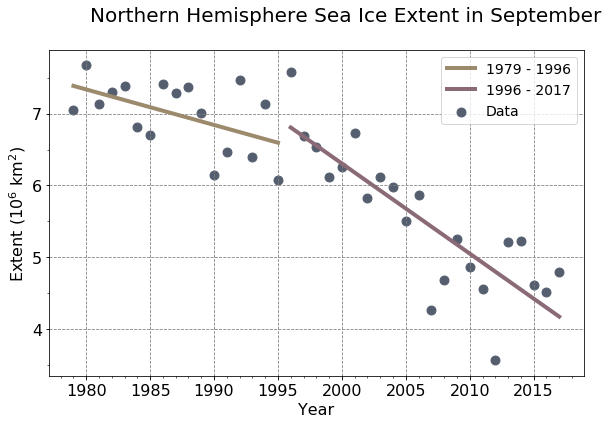

In [36]:
#and replotting

fig = plt.figure(figsize=(11, 6))

fig.suptitle('Northern Hemisphere Sea Ice Extent in September', fontsize=20)

#create grid spec and axis
gs = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0, right = 0.8)

#creating ax1 and ax2 for upper plots
ax = fig.add_subplot(gs[:,:])

ax.scatter(septSeaIce['year'], septSeaIce[' extent'], color = '#545e6e', s = 80, 
           label = 'Data')
ax.plot(xPre96,  yModelPre96,  color = '#9c8a6d', linewidth = 4.0, label = '1979 - 1996')
ax.plot(xPost96, yModelPost96, color = '#8b6a77', linewidth = 4.0, label = '1996 - 2017')
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Extent (10$^{6}$ km$^{2}$)', fontsize = 16)

ax.grid(color='gray', linestyle='dashed')
ax.tick_params(labelsize=16)

#set up locators
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

print("Fit Report - Pre 1996: \n \tRMSE: +/- {:.2f}".format(RMSEPre) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(interceptPre96, errInterPre)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slopePre96, errSlopePre))

print("Fit Report - Post 1996: \n \tRMSE: +/- {:.2f}".format(RMSEPost) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(interceptPost96, errInterPost)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slopePost96, errSlopePost))


ax.legend(prop={'size':14});


### What units do you think are on the slope? Let's think about the physical meaning of this data.


# SUMMARY

From this lab you have learned the basics of linear regression, netCDF, and geolocated data as well as how to make quantitative color bars.

Homework: 
- Lab report 6 is the lab report before break woohoo! The Lab 5 report is due this Friday the 22nd. Office hours are Thursday from 1 - 3 PM.  